In [21]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import numpy as np

import keras
from keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras.utils import plot_model 


%matplotlib inline
import tensorflow as tf
from IPython.display import SVG

In [2]:
ROWS = 224
COLS = 224
CHANNELS = 3
CLASSES = 2

In [3]:
train_path = 'faces/train'
valid_path = 'faces/valid'
test_path = 'faces/valid'

In [4]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['faces', 'animal'], batch_size=15)
valid_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['faces', 'animal'], batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['faces', 'animal'], batch_size=15)

Found 2410 images belonging to 2 classes.
Found 2410 images belonging to 2 classes.
Found 2410 images belonging to 2 classes.


In [5]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

C:\Users\Mattmad1234\anaconda3\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


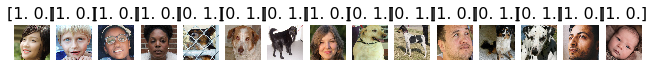

In [6]:
imgs, labels = next(train_batches)
plots(imgs, titles=labels)

In [7]:
num_filters = 8
filter_size = 3
pool_size = 2

model = Sequential([
    Conv2D(num_filters, filter_size, input_shape=(ROWS, COLS, CHANNELS)),
    MaxPooling2D(pool_size=pool_size),
    Flatten(),
    Dense(2, activation='softmax'),
])

In [8]:
model.compile(Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(train_batches, steps_per_epoch=50,
                   validation_data=valid_batches, validation_steps=4, epochs=10, verbose=1)

Epoch 1/10
50/50 [==============================] - 9s 168ms/step - loss: 107.6629 - accuracy: 0.6693 - val_loss: 59.8902 - val_accuracy: 0.6250
Epoch 2/10
50/50 [==============================] - 8s 167ms/step - loss: 35.6366 - accuracy: 0.7960 - val_loss: 6.7115 - val_accuracy: 0.9250
Epoch 3/10
50/50 [==============================] - 9s 175ms/step - loss: 39.7226 - accuracy: 0.7920 - val_loss: 38.9038 - val_accuracy: 0.7750
Epoch 4/10
50/50 [==============================] - 9s 185ms/step - loss: 30.3365 - accuracy: 0.8507 - val_loss: 7.1781 - val_accuracy: 0.9500
Epoch 5/10
50/50 [==============================] - 8s 161ms/step - loss: 17.1988 - accuracy: 0.8846 - val_loss: 18.5402 - val_accuracy: 0.8750
Epoch 6/10
50/50 [==============================] - 9s 171ms/step - loss: 11.0878 - accuracy: 0.9133 - val_loss: 21.3842 - val_accuracy: 0.8250
Epoch 7/10
50/50 [==============================] - 9s 175ms/step - loss: 12.5235 - accuracy: 0.8880 - val_loss: 2.5854 - val_accuracy: 0

In [10]:
model.save_weights('cnn.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 8)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 98568)             0         
                                                                 
 dense (Dense)               (None, 2)                 197138    
                                                                 
Total params: 197,362
Trainable params: 197,362
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 137ms/step - loss: 15.9690 - accuracy: 0.9333
0.9333333373069763


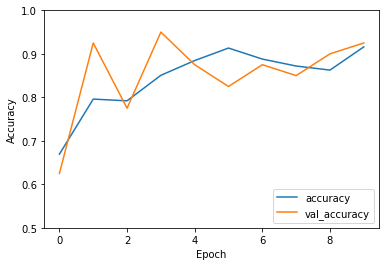

In [11]:
model.summary()

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(imgs,  labels, verbose=1)
print(test_acc)

In [12]:
predictions = model.predict(imgs[:50])
print("First 15 predictions from Test Batch:",np.argmax(predictions, axis=1))
print("Actual values for test Batch        :",np.argmax(labels[:15], axis=1))

First 15 predictions from Test Batch: [0 0 0 0 1 1 1 0 1 1 1 1 1 0 0]
Actual values for test Batch        : [0 0 0 0 1 1 1 0 1 1 0 1 1 0 0]


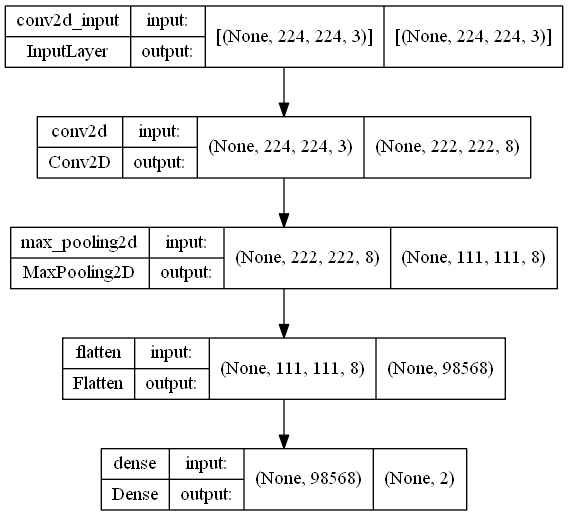

In [24]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))
plot_model(model, show_shapes=False, show_layer_names=True, to_file='model.png') 
plot_model(model, show_shapes=True, show_layer_names=True, to_file='modelshapes.png') 
